<a href="https://colab.research.google.com/github/jpcanamaque/codingdojo-project/blob/master/CodingDojo_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project
Authored by Johnroe Paulo Canamaque

## Part 1: Modules and Data Import

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np

# Viz modules
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Import sales dataset

sales_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTB8dpLqxYs1II-ubJFUnfFu2jO8TEVnDPjAJ2rl3Yup02v-UzBapk3tE_Vft51jvAkwftMpsWBCJpn/pub?output=csv')
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Part 2: Data Cleansing
### Overview
- There are 8523 rows and 12 columns
- Data types were correctly assigned to every columns based on their contents
- `Item_Fat_Content` has multiple values that are not standard to the current values in the column. For this case, we replaced the values with the standard one
- No duplicated values seen
- `Item_Weight` and `Outlet_Size` have missing values. Missing values were dealt accordingly

In [3]:
# Getting the shape of the dataframe to determine row and column count
sales_df.shape

# There are 8523 rows and 12 columns for this dataframe

(8523, 12)

In [4]:
# Checking the data types of each columns, and from here, try to set the right
# data type for the columns

sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
# In this part, we will check if we have values that are not standardized
# For this, we will check for each columns and check for the values generated
for col in sales_df.columns:
  display(f"Check for column {col}: ")
  display(sales_df[col].value_counts())
  display("=============================")

'Check for column Item_Identifier: '

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

'============================='

'Check for column Item_Weight: '

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

'============================='

'Check for column Item_Fat_Content: '

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

'============================='

'Check for column Item_Visibility: '

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

'============================='

'Check for column Item_Type: '

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

'============================='

'Check for column Item_MRP: '

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

'============================='

'Check for column Outlet_Identifier: '

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

'============================='

'Check for column Outlet_Establishment_Year: '

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

'============================='

'Check for column Outlet_Size: '

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

'============================='

'Check for column Outlet_Location_Type: '

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

'============================='

'Check for column Outlet_Type: '

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

'============================='

'Check for column Item_Outlet_Sales: '

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

'============================='

In [6]:
# After observing the output, we noticed that the Item_Fat_Content contains
# multiple values that may be the same with other existing values

# For this case, we need to standardize the current values to make sure that the
# values are not scattered to different categories that are possible the same

# Standardizing values for Item_Fat_Content
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].str.title()
ifc_std = {"Lf": "Low Fat", 'Reg': "Regular"}
sales_df.replace({'Item_Fat_Content' : ifc_std}, inplace=True)
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [7]:
# Duplicate checking
# We need to remove duplicate values in order to ensure the quality of the data
# And to prevent it from messing up with out future calculations

len(sales_df[sales_df.duplicated() == True])

# Since there are no duplicate values, we can proceed with the next steps

0

In [8]:
# Initial Checking for NA values

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
# Based on the information, only Item_Weight and Outlet_Size have missing data
# For this, we need to handle missing values for each

# For the Outlet_Size, we will use the most common outlet size in the series
# and impute the Outlet_Size column with the most common value. We used this approach
# because this is the most effective way to impute categorical features of the data

common_outlet_size = sales_df['Outlet_Size'].value_counts().index.tolist()[0]

sales_df = sales_df.fillna(value={'Outlet_Size': common_outlet_size})
sales_df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [10]:
# For the Item_Weight, the safest will be imputing it with the mean value of the
# the weight

avg_wt = sales_df['Item_Weight'].mean()
sales_df= sales_df.fillna(value={'Item_Weight' : avg_wt})
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [11]:
# Rechecking for NA values and duplicates
display(f"Duplicate count: {len(sales_df[sales_df.duplicated() == True])}")
display("=========================================")
sales_df.info()

'Duplicate count: 0'

'========================================='

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
# Doing some final check to all the columns in the dataframe by doing some
# stat work

sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
# Final view of the cleaned data

sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Part 3: Exploratory Data Analysis
### Overview:
- Dataset has 7 categorical columns and 5 numerical columns
- `Item_Outlet_Sales` and `Item_Visibility` are positively skewed and not normally distributed
- `Item_Weight` is normally distributed with no appreciable skewness
- From the box plots on the categorical data related to the `Item_Outlet_Sales`, most of the data have outliers that are dispersed
- There is only 1 pair of columns that have a significant correlation across the dataset

In [14]:
# Checking for the characteristics of our data

# Let us first determine our data types to group them into Categorical and Numerical

sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

As seen above, we can group the Categorical data by grouping string values, and we can categorize numerical data from the data by grouping number values

Below will be the new data frames based on their groupings

In [15]:
# Grouping categorical data
sales_cat_data_df = sales_df.select_dtypes(include=[object])

# Grouping numerical data
sales_num_data_df = sales_df.select_dtypes(include=['number'])

# Display the new data frames
display(sales_cat_data_df, sales_num_data_df)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


### Histograms

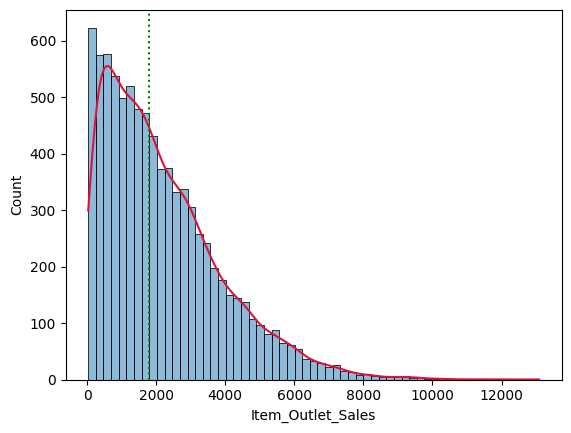

In [16]:
# Histograms

# This is used to identify the distribution of the measures in our data.

# In our case, we are interested to find the distribution of the
# Item_Outlet_Sales in the data

ax = sns.histplot(sales_num_data_df, x="Item_Outlet_Sales", kde=True);
plt.axvline(sales_num_data_df['Item_Outlet_Sales'].median(), color="green", ls=":")
ax.lines[0].set_color('crimson')

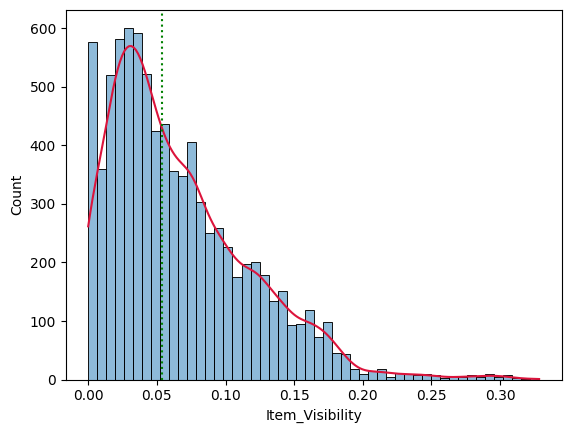

In [17]:
# We are also interested to find the distribution of the
# Item_Visibility in the data

ax = sns.histplot(sales_num_data_df, x="Item_Visibility", kde=True);
plt.axvline(sales_num_data_df['Item_Visibility'].median(), color="green", ls=":")
ax.lines[0].set_color('crimson')

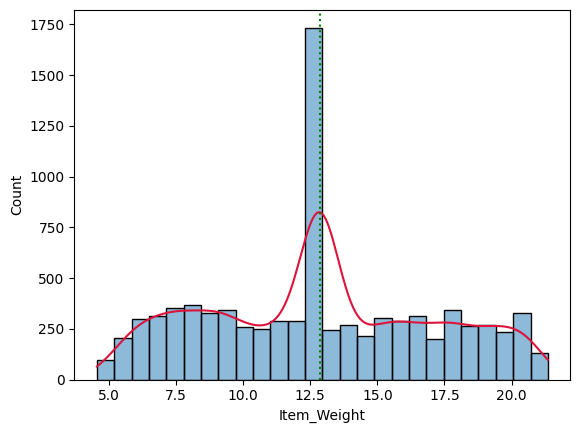

In [18]:
# We are also interested to find the distribution of the
# Item_Weight in the data

ax = sns.histplot(sales_num_data_df, x="Item_Weight", kde=True);
plt.axvline(sales_num_data_df['Item_Weight'].median(), color="green", ls=":")
ax.lines[0].set_color('crimson')

From the histograms above, the data suggests that:
- `Item_Outlet_Sales` is a positive skewed distribution, and appears to be not showing a normal distribution
- The median of the `Item_Outlet_Sales` column is far away from the peak count of the column, which is affected by the positive skew
- `Item_Visibility` is a positive skewed distribution, and also appears to be not showing a normal distribution
- The median of the `Item_Visibility` column is far away from the peak count of the column, which is affected by the positive skew
- `Item_Weight` is a normal distribution with no appreciable skewness in the data
- The median of the `Item_Weight` column is on the near the peak count of the column, which enforces the normal distribution of the column

### Box Plots

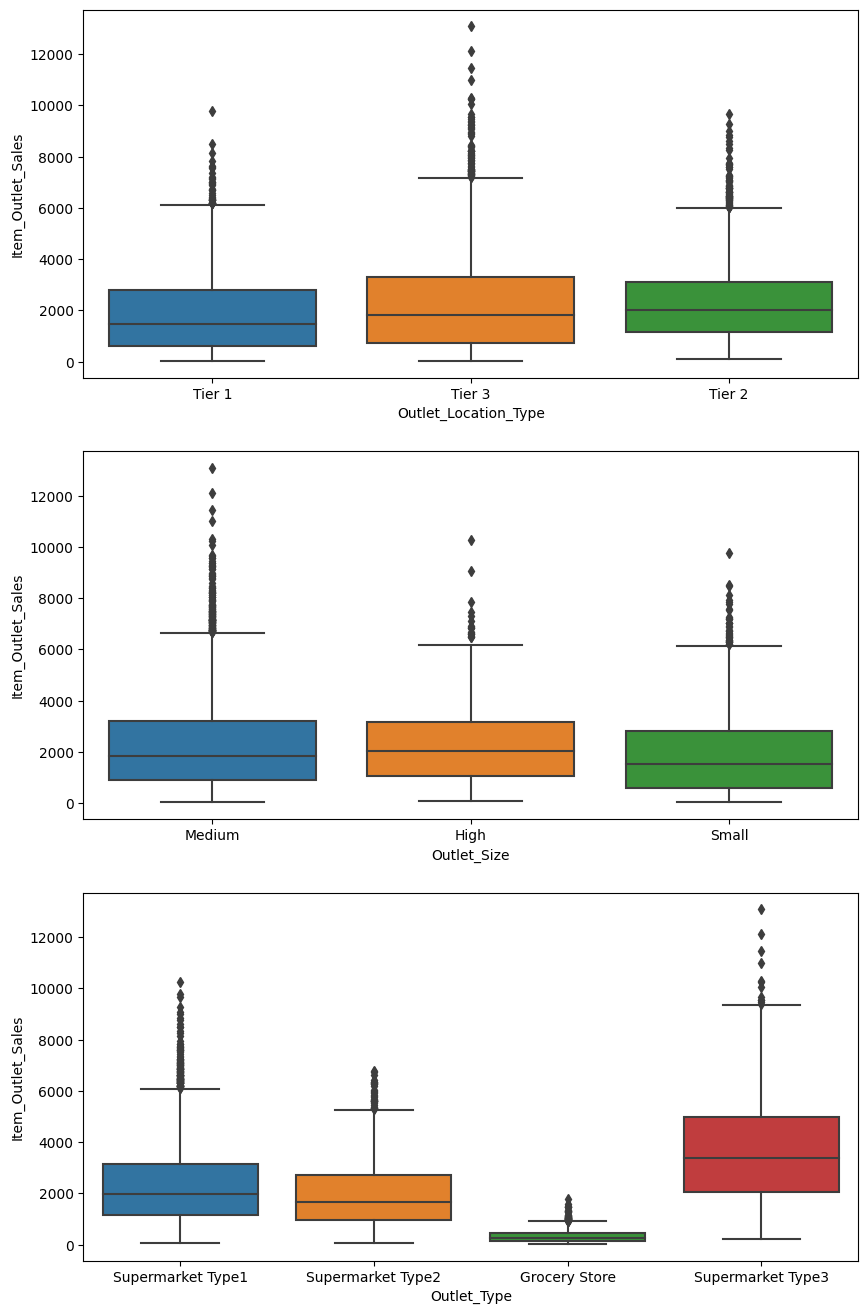

In [19]:
# Using the dataset we have, we need to find the distribution per categorical measures in our data

# We want to find the outlet sales per outlet tier
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(data = sales_df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales');

plt.subplot(312)
sns.boxplot(data = sales_df, x = 'Outlet_Size', y = 'Item_Outlet_Sales');

plt.subplot(313)
sns.boxplot(data = sales_df, x = 'Outlet_Type', y = 'Item_Outlet_Sales');

plt.subplots_adjust(wspace = 0.2, hspace = 0.2,top = 1.5);

Based on the graphs above, the data suggests the following:
- On the `Outlet_Location_Type`, Tier 3 has the largest distribution among others, which means majority of the data are coming from Tier 3. Tier 2 has the least distribution among others.
- Outliers from `Outlet_Location_Type` are spread across each tiers, but the highest outlier is at Tier 3. Among the three tiers, Tier 2 has the outlier with the least dispersion.
- On the `Outlet_Size`, all of the sizes have almost the same distribution, with Medium being with the most observations. While most of them have almost the same distribution, all of them have different median values that is relatively near to each other.
- Outliers from `Outlet_Size` are spread across each sizes, but the highest outliers is at the Medium size. Large size has the most dispersed outlier in this case.
- Among the `Outlet_Type`, Grocery Store appears to have the lowest distribution. Supermarket Type3 has the highest distribution.
- Outliers from `Outlet_Type` are spread across each types, but the highest outlier is at Supermarket Type3. It has also the most dispersed outliers

### Correlation Heatmap

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


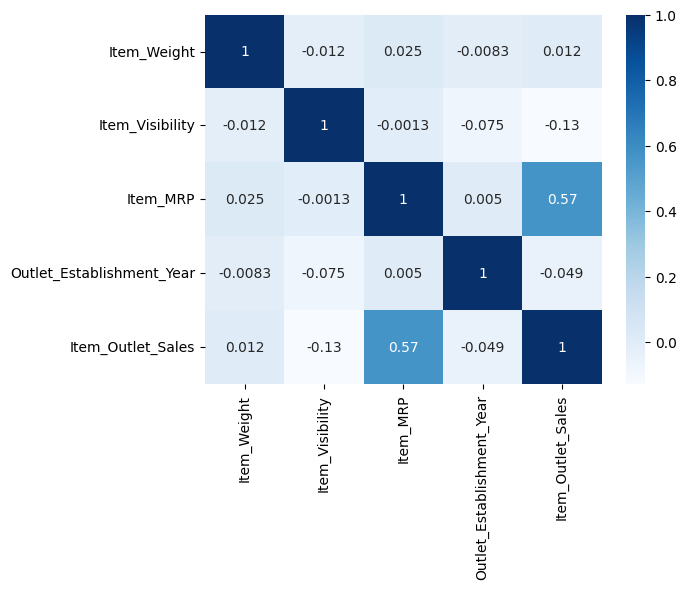

In [20]:
# Correlation Heatmap
# This is to find any correlation in the data that we have. This will help us in
# understanding the patterns and trends happening on each of the measures that
# we have

# Finding the correlation using Pandas
corr = sales_num_data_df.corr(numeric_only=True)
display(corr);
sns.heatmap(corr, cmap = 'Blues',  annot = True);

From the graph above, the data suggests the following:
- The `Item_MRP` has slighty positive correlation to the `Item_Outlet_Sales`




## Part 4: Explanatory Data Analysis
### Overview
- Based on `Top 10 Highest Total and Average Sales per Outlet` graph, OUT027 has the highest sales all time with around 3.45 million sales, averaging 3694.04 of sales all time
- Based on `Top 10 Highest Total and Average Sales per Outlet` graph, OUT019 has the lowest sales all time with around 179,694 sales, averaging 340.33 of sales all time
- Based on `Outlet Sales Trend per Location Type` graph. Tier 1 has an uptrend that spans from 1985 up to 2000.
- Based on `Outlet Sales Trend per Location Type` graph. Tier 2 has an uptrend that spans from around 2002 up to 2007.
- Based on `Outlet Sales Trend per Location Type` graph. Tier 3 had a downtrend from 1985 to 1997, but had an uptrend from 1997 until 2010

In [21]:
# Graph 1: Top 10 Highest Total and Average Sales per Outlet
# This graph contains the total and average for each outlet identifier.

# We need first to create our dataset for this graph
outlet_identifier_df = sales_df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].agg(
    Avg_Item_Outlet_Sales=('Item_Outlet_Sales', np.mean),
    Total_Item_Outlet_Sales=('Item_Outlet_Sales', np.sum))
outlet_identifier_df = outlet_identifier_df.reset_index(['Outlet_Identifier'])
outlet_identifier_df.sort_values(by=['Total_Item_Outlet_Sales'], ascending=False, inplace=True)
outlet_identifier_df

,Outlet_Identifier,Avg_Item_Outlet_Sales,Total_Item_Outlet_Sales
5,OUT027,3694.038558,3.453926e+06
6,OUT035,2438.841866,2.268123e+06
9,OUT049,2348.354635,2.183970e+06
2,OUT017,2340.675263,2.167465e+06
1,OUT013,2298.995256,2.142664e+06
8,OUT046,2277.844267,2.118395e+06
7,OUT045,2192.384798,2.036725e+06
3,OUT018,1995.498739,1.851823e+06
0,OUT010,339.351662,1.883402e+05
4,OUT019,340.329723,1.796941e+05


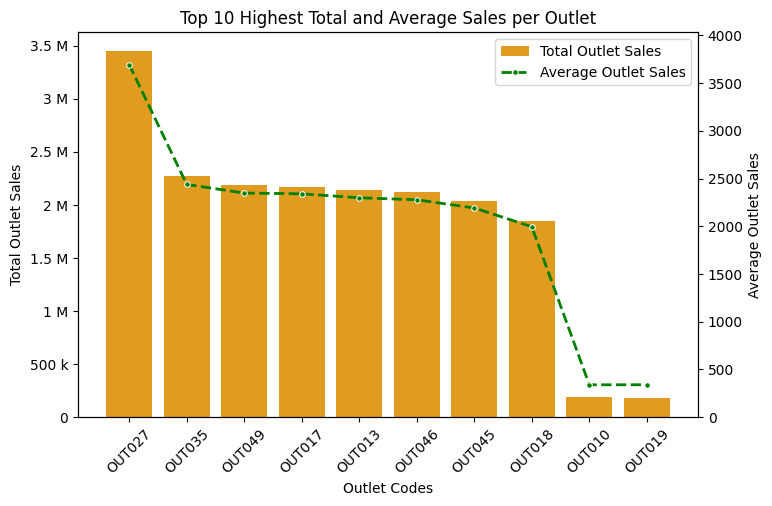

In [22]:
# Drawing the bar charts here

# Create the subplots for the graph
fig, ax = plt.subplots(figsize=(8, 5))

# Create the bar chart for the total outlet sales
sns.barplot(data = outlet_identifier_df,
            ax=ax,
            x='Outlet_Identifier',
            y='Total_Item_Outlet_Sales',
            label='Total Outlet Sales',
            color="orange");

# Creating another y axis for the average dataset
ax2 = plt.twinx()

# Create the line chart for the average outlet sales
sns.lineplot(data = outlet_identifier_df,
             ax=ax2,
             x='Outlet_Identifier',
             y='Avg_Item_Outlet_Sales',
             marker='o',
             markersize=4,
             color="green",
             linewidth=2,
             linestyle="--",
             label='Average Outlet Sales'
             );

# Setting the title
ax.set_title("Top 10 Highest Total and Average Sales per Outlet")

# Setting the x axis
ax.set_xlabel("Outlet Codes")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Setting the y axis
ax.set_ylabel("Total Outlet Sales");
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Setting the y2 axis
ax2.set_ylabel("Average Outlet Sales");

# Setting the limitations for the y2
ax2.set_ylim(0, outlet_identifier_df['Avg_Item_Outlet_Sales'].max() + outlet_identifier_df['Avg_Item_Outlet_Sales'].min())

# Combining the legend handles from both axes
# then render in one legend only
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0);

From the graph above, the data suggests that:
- OUT027 has the highest sales all time with around 3.45 million sales, averaging 3694.04 of sales all time
- OUT019 has the lowest sales all time with around 179,694 sales, averaging 340.33 of sales all time

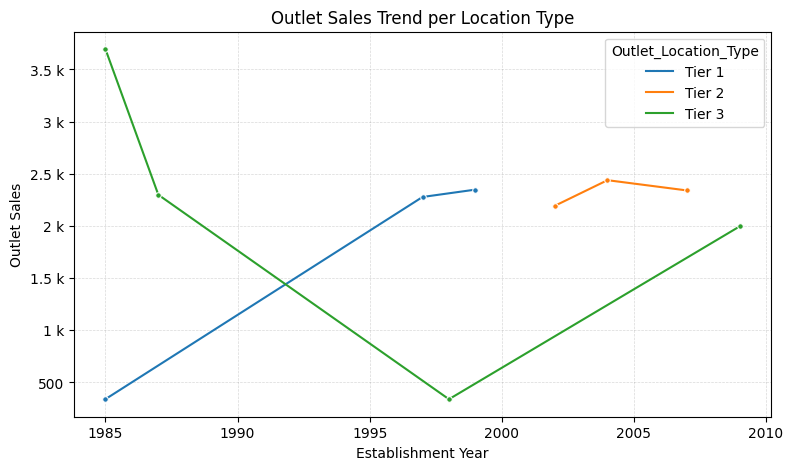

In [23]:
# Graph 3: Outlet Sales Trend per Location Type
# This graph shows the trend of sales data per location type

# Create the subplot data and apply style
fig, ax = plt.subplots(figsize=(9, 5))
plt.style.use('fast')

# Draw the line chart
sns.lineplot(x='Outlet_Establishment_Year',
             y='Item_Outlet_Sales',
             data= sales_df,
             hue='Outlet_Location_Type',
             ax=ax, marker='o',
             markersize=4,
             hue_order = ['Tier 1', 'Tier 2', 'Tier 3'],
             errorbar=None
             );

# Set the title of the graph
ax.set_title('Outlet Sales Trend per Location Type')

# Set the y label
ax.set_ylabel("Outlet Sales");
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Set the x label
ax.set_xlabel("Establishment Year")

# Set the grid for easier viewing
ax.grid(color = 'gray', alpha=0.3, linestyle = '--', linewidth = 0.5);

From the graph above, the data suggests that:
- Tier 1 had an uptrend that spans from 1985 up to 2000.
- Tier 2 has an uptrend that spans from around 2002 up to 2007. It also suggests that Tier 2 outlets only started around that time
- Tier 3 had a downtrend from 1985 to 1997, but had an uptrend from 1997 until 2010
- The data does not suggest continuous trend for each tier. Further data processing needed or more data should be used in order to find the patterns and trends needed.